##  $ Y = b_0 + b_1x_1 + b_2x_2^2 + b_3x_3^3 + ...... + b_nx_n^n $ 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
x = df.iloc[:,1:2].values
y = df.iloc[:,2].values

In [4]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

## Simple Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

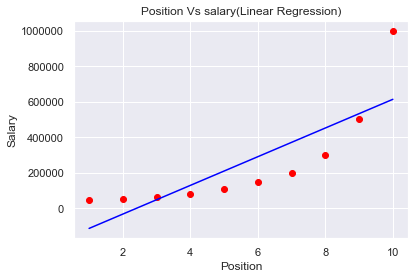

In [6]:
import seaborn as sns
sns.set()
plt.scatter(x,y, color='red')
plt.plot(x, lin_reg.predict(x), color='blue')
plt.title('Position Vs salary(Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [7]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Polynomial Regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=7)
x_poly = poly_reg.fit_transform(x)

In [9]:
x_poly

array([[1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01, 6.400000e+01, 1.280000e+02],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01,
        8.100000e+01, 2.430000e+02, 7.290000e+02, 2.187000e+03],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02, 1.024000e+03, 4.096000e+03, 1.638400e+04],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02, 3.125000e+03, 1.562500e+04, 7.812500e+04],
       [1.000000e+00, 6.000000e+00, 3.600000e+01, 2.160000e+02,
        1.296000e+03, 7.776000e+03, 4.665600e+04, 2.799360e+05],
       [1.000000e+00, 7.000000e+00, 4.900000e+01, 3.430000e+02,
        2.401000e+03, 1.680700e+04, 1.176490e+05, 8.235430e+05],
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02,
        4.096000e+03, 3.276800e+0

In [10]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

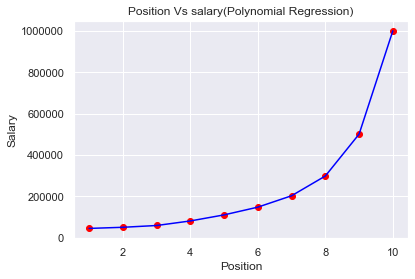

In [11]:
plt.scatter(x,y, color='red')
plt.plot(x, lin_reg2.predict(poly_reg.fit_transform(x)), color='blue')
plt.title('Position Vs salary(Polynomial Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

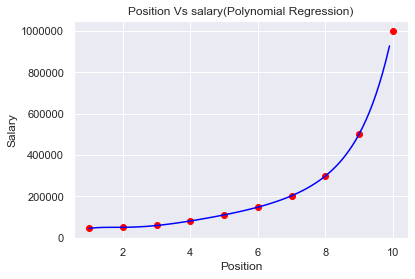

In [12]:
x_grid = np.arange(min(x), max(x),0.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(x,y, color='red')
plt.plot(x_grid, lin_reg2.predict(poly_reg.fit_transform(x_grid)), color='blue')
plt.title('Position Vs salary(Polynomial Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [13]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

array([172108.3762105])

In [14]:
lin_reg.predict([[6.5]])

array([330378.78787879])